In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_regression

In [6]:
X,y = make_regression(n_features= 2 ,n_samples= 1000 ,n_targets= 1 ,noise= 0.3)

In [7]:
X

array([[ 1.1248751 ,  0.63215258],
       [ 1.11828458,  0.39393415],
       [ 0.41756689, -0.63204087],
       ...,
       [-0.49974053,  1.01456596],
       [ 0.37692525, -0.11661294],
       [ 0.53943104, -0.67265225]])

In [8]:
y

array([ 1.16878185e+02,  1.03120896e+02, -3.90818178e+00, -1.50598822e+02,
       -4.16855246e+01,  8.17723432e+01, -6.73921063e+01, -5.78251511e+00,
       -1.30039325e+01,  7.13152137e+01, -1.04928469e+02, -7.10261421e+01,
       -9.17196823e+01,  1.32820768e+02, -1.08604592e+02,  1.42357101e+02,
       -1.44868414e+02,  6.40808283e+01,  1.23315676e+02,  1.02736257e+02,
       -2.84284595e+01,  4.70363948e+01,  2.47140077e+01, -3.87531522e+01,
        2.02288154e+01, -8.95991727e+01, -1.44790321e+02, -3.67020645e+00,
       -7.20888505e+00,  8.05330887e+01, -7.61538587e+01, -1.28107652e-01,
       -4.50329352e+01, -9.27338868e+01,  2.21262848e+01,  2.25660577e+02,
        2.23357218e+01,  6.77491173e+01, -1.54681809e+01, -3.36430695e+01,
        3.86872978e+00, -1.04190807e+02, -1.41482925e+02,  1.18194479e+01,
        1.01433491e+02,  1.22128658e+02, -6.00532385e+01, -1.26411268e+02,
        1.36547821e+00, -8.17268074e+00, -3.51607026e+01,  7.66530027e+01,
        2.60633280e+01, -

In [10]:
pd.DataFrame(X)[0]

0      1.124875
1      1.118285
2      0.417567
3     -0.659919
4      0.207407
         ...   
995   -0.875751
996   -0.499971
997   -0.499741
998    0.376925
999    0.539431
Name: 0, Length: 1000, dtype: float64

In [11]:
pd.DataFrame(X)[1]

0      0.632153
1      0.393934
2     -0.632041
3     -1.880222
4     -1.040351
         ...   
995   -0.979412
996    2.623605
997    1.014566
998   -0.116613
999   -0.672652
Name: 1, Length: 1000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

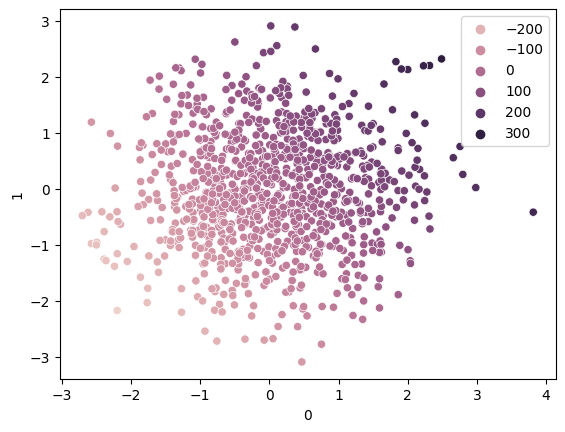

In [14]:
sns.scatterplot(x = pd.DataFrame(X)[0] , y = pd.DataFrame(X)[1] , hue=y)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [17]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((700, 2), (300, 2), (700,), (300,))

In [18]:
from sklearn.svm import SVR

In [22]:
svr = SVR(kernel="linear")

In [23]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [24]:
svr.coef_

array([[73.13674688, 54.34714373]])

In [25]:
svr.intercept_

array([-0.03128578])

In [26]:
y_pre = svr.predict(X_test)

In [27]:
y_pre

array([  57.0119505 ,   49.13346851,  -70.69282184, -103.90388069,
        222.85882481, -123.99311032, -142.57353316,  289.02877887,
         -4.57973539,   79.84668327,  137.51269788,   74.9219675 ,
         54.80261309,   93.70470337,  -25.57310765,  169.33696305,
        137.89447155,   13.8059554 ,   19.94653357,  -87.41026277,
       -223.71353432,   -9.01661428, -116.88918578, -278.83302406,
          5.68971198,   63.10682102,  137.88482015,    2.82788629,
         -1.53410011,   43.66501991,    1.58737523,   56.79119163,
        -16.66427082,  109.14554123,   53.41334176,  206.87154411,
        -74.05279274,  -49.31693637,   32.72460277,   -1.28037847,
       -132.68564114,   55.93948523,   47.42315417,  -74.73676784,
        -22.65276308,   47.39246096,   57.72368554,    7.1025527 ,
        -47.0466468 ,    6.7199337 ,  -21.85466869,  -31.93444382,
        102.86376228,   -0.92995256,  -38.39199047,  -75.83100208,
       -118.33794813, -105.07175314,  103.40869191,  -25.99789

In [28]:
from sklearn.metrics import r2_score

In [29]:
r2_score(y_test,y_pre)

0.9999886152230135

In [30]:
# hyper tuning

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
para = {
    "C" : [0.1,1,10,100,1000],
    "gamma" : [1,0.1,0.01,0.001,0.0001],
    "kernel" : ["linear"],
    "epsilon" : [0.1,0.2,0.3]
}

In [36]:
gri = GridSearchCV(SVR(),param_grid=para,refit=True,cv=5,verbose=3)

In [37]:
gri.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.721 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.740 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.729 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.733 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.741 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.721 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.740 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.729 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.733 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.741 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

[CV 3/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/

[CV 5/5] END C=10, epsilon=0.2, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=1.000 total time=   

[CV 5/5] END C=100, epsilon=0.2, gamma=0.0001, kernel=linear;, score=1.000 total time=   0.5s
[CV 1/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=1.000 total time=   0.4s
[CV 2/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=1.000 total time=   0.3s
[CV 3/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=1.000 total time=   0.3s
[CV 4/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=1.000 total time=   0.4s
[CV 5/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=1.000 total time=   0.4s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=1.000 total time=   0.3s
[CV 2/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=1.000 total time=   0.3s
[CV 3/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=1.000 total time=   0.3s
[CV 4/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=1.000 total time=   0.4s
[CV 5/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=1.000 total time=   0.4s
[CV 1/

[CV 4/5] END C=1000, epsilon=0.3, gamma=0.01, kernel=linear;, score=1.000 total time=   4.4s
[CV 5/5] END C=1000, epsilon=0.3, gamma=0.01, kernel=linear;, score=1.000 total time=   2.9s
[CV 1/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=1.000 total time=   4.2s
[CV 2/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=1.000 total time=   3.2s
[CV 3/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=1.000 total time=   3.3s
[CV 4/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=1.000 total time=   4.3s
[CV 5/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=1.000 total time=   2.9s
[CV 1/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=1.000 total time=   4.3s
[CV 2/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=1.000 total time=   3.2s
[CV 3/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=1.000 total time=   3.6s
[CV 4/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=line

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [38]:
gri.best_params_

{'C': 1000, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [39]:
from sklearn.svm import SVR

In [40]:
svr = SVR(C=1000,epsilon=0.3,gamma=1,kernel="linear")

In [41]:
svr.fit(X_train,y_train)

SVR(C=1000, epsilon=0.3, gamma=1, kernel='linear')

In [42]:
y_predict = svr.predict(X_test)

In [43]:
y_predict

array([  57.04755966,   49.16591437,  -70.71863626, -103.9460449 ,
        222.9780546 , -124.04482482, -142.63531046,  289.18058098,
         -4.57177398,   79.89527211,  137.58885094,   74.9674085 ,
         54.83714049,   93.75975714,  -25.5772461 ,  169.4294179 ,
        137.97087787,   13.82233512,   19.96425116,  -87.44552956,
       -223.81423647,   -9.01172197, -116.93721102, -278.96215238,
          5.70106977,   63.14604109,  137.96063978,    2.83799935,
         -1.52536992,   43.69485406,    1.59608241,   56.82824478,
        -16.66383161,  109.20853155,   53.44784591,  206.98255716,
        -74.08085914,  -49.3328353 ,   32.75046157,   -1.27235672,
       -132.74207236,   55.97517429,   47.45502052,  -74.76460607,
        -22.65624637,   47.42652265,   57.76114053,    7.11444008,
        -47.0626829 ,    6.73166273,  -21.85628882,  -31.94175887,
        102.92328544,   -0.92295309,  -38.40259572,  -75.85911541,
       -118.38716764, -105.11429417,  103.4684476 ,  -26.00221

In [46]:
from sklearn.metrics import r2_score

In [48]:
r = r2_score(y_test,y_predict)

In [61]:
adj_r2 = 1 - ((1-r)*(len(y_predict)-1))/(len(y_predict) - X_test.shape[1] -1)

In [62]:
adj_r2

0.9999891628432375